Import Libraries

In [1]:
import requests
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.generativeai import GenerativeModel, configure

Firecrawl API Setup

In [ ]:
FIRECRAWL_API_KEY = ''  # Insert your API key
target_url = 'https://techcrunch.com/'

firecrawl_endpoint = 'https://api.firecrawl.dev/v1/scrape'
firecrawl_payload = {
    "url": target_url,
    "formats": ["markdown"],
    "onlyMainContent": True
}

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {FIRECRAWL_API_KEY}"
}


In [6]:
#Fetch website content
response = requests.post(firecrawl_endpoint, headers=headers, data=json.dumps(firecrawl_payload))

if response.status_code == 200:
    scraped_data = response.json()
    content = scraped_data.get("data", {}).get("markdown", "")
    print("Firecrawl Scrape Successful!\n")
else:
    print("Firecrawl Error:", response.text)
    content = None

✅ Firecrawl Scrape Successful!



Gemini Setup and AI Trend Extraction

In [ ]:
if content:
    configure(api_key="")  # Insert your Gemini API Key here
    model = GenerativeModel("gemini-1.5-flash")

    prompt = f"""
    Analyze the following website content and list the top 10 emerging technology trends.
    Provide the output strictly in the following format:

    1. Trend Name - Importance Score (out of 100)
    2. Trend Name - Importance Score (out of 100)
    3. Trend Name - Importance Score (out of 100)
    4. Trend Name - Importance Score (out of 100)
    5. Trend Name - Importance Score (out of 100)
    6. Trend Name - Importance Score (out of 100)
    7. Trend Name - Importance Score (out of 100)
    8. Trend Name - Importance Score (out of 100)
    9. Trend Name - Importance Score (out of 100)
    10. Trend Name - Importance Score (out of 100)

    Here is the content:
    {content[:10000]}  # Limiting to 10000 chars
    """

    gemini_response = model.generate_content(prompt)
    trend_text = gemini_response.text
    print("Gemini Detected Trends with Scores:\n", trend_text)
else:
    print("No content to summarize.")
    trend_text = None


Gemini Detected Trends with Scores:
 Based on the provided text, here's a list of emerging technology trends and an importance score (purely subjective based on frequency and prominence in the text):

1. AI (Artificial Intelligence) - 95
2.  AI Reasoning Models - 85
3.  Android OS Development - 70
4.  Robotics - 70
5.  Cybersecurity - 65
6.  Nuclear Fusion - 60
7.  AI-powered image editing - 55
8.  Ocean Mapping Technology - 50
9.  App Store Ecosystem - 45
10. AI Storage Solutions - 40

**Note:**  The importance scores are estimations based on the limited sample of news items.  A more comprehensive analysis would require a much larger dataset.  The scores reflect the relative prominence within this specific text, not their overall importance in the broader technological landscape.



Data Analysis + Visualization


Trend DataFrame:
                           Trend  ImportanceScore
0  AI (Artificial Intelligence)               95
1           AI Reasoning Models               85
2        Android OS Development               70
3                      Robotics               70
4                 Cybersecurity               65
5                Nuclear Fusion               60
6      AI-powered image editing               55
7      Ocean Mapping Technology               50
8           App Store Ecosystem               45
9          AI Storage Solutions               40

Basic Analysis:
Total Unique Trends: 10
Top Trend by Importance:
 Trend              AI (Artificial Intelligence)
ImportanceScore                              95
Name: 0, dtype: object


<ipython-input-13-2270006286>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ImportanceScore', y='Trend', data=top10, palette='plasma')


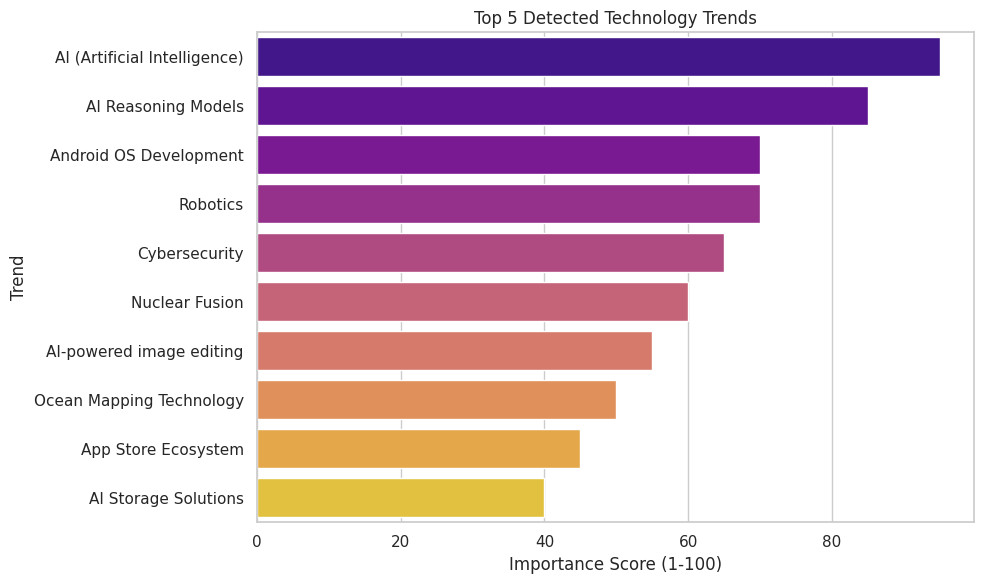

In [13]:
if trend_text:
    # Extract trends and scores using regex
    trend_data = re.findall(r"\d+\.\s*(.*?)\s*-\s*(\d+)", trend_text)

    if not trend_data:
        print("Could not parse trends and scores from Gemini output.")
        trend_data = []

    # Create DataFrame if data exists
    if trend_data:
        trends, scores = zip(*trend_data)
        scores = [int(score) for score in scores]  # Convert scores to integers

        df_trends = pd.DataFrame({
            'Trend': trends,
            'ImportanceScore': scores
        })

        print("\nTrend DataFrame:\n", df_trends)

        # --- Basic Data Analysis ---
        print("\nBasic Analysis:")
        print("Total Unique Trends:", df_trends['Trend'].nunique())
        print("Top Trend by Importance:\n", df_trends.loc[df_trends['ImportanceScore'].idxmax()])

        # --- Visualization ---
        top10 = df_trends.sort_values(by='ImportanceScore', ascending=False).head(10)

        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        sns.barplot(x='ImportanceScore', y='Trend', data=top10, palette='plasma')
        plt.title("Top 10 Detected Technology Trends")
        plt.xlabel("Importance Score (1-100)")
        plt.ylabel("Trend")
        plt.tight_layout()
        plt.show()
    else:
        print("No valid trend-score data found.")
else:
    print("No trends extracted for analysis/visualization.")